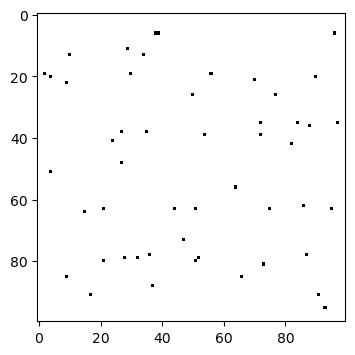

In [7]:
import matplotlib.pyplot as plt
import numpy as np

from pymoo.core.population import Population
from pymoo.core.problem import Problem
from pymoo.operators.mutation.bitflip import BitflipMutation

n_var, n_matings = 100, 50

problem = Problem(n_var=n_var, vtype=bool)

X = np.full((100, 100), False)
pop = Population.new(X=X)

mutation = BitflipMutation(prob=0.5)
Xp = mutation(problem, pop).get("X")

plt.figure(figsize=(4, 4))
plt.imshow(X != Xp, cmap='Greys', interpolation='nearest')
plt.show()


In [2]:
prev = np.array([[1, 0, 0, 1],[1, 0, 1, 0]]).astype(bool)
current = np.array([[1, 0, 0, 1], [0, 0, 0, 1], [1,1,1,1]]).astype(bool)

for e in current:
    print(e != prev)
    print(np.sum(e != prev, axis=1))
    print(np.sum(e != prev, axis=1).max())
    
print([np.sum(e != prev, axis=1).max() / len(e) for e in current])

np.mean([np.sum(e != prev, axis=1).max() / len(e) for e in current])

[[False False False False]
 [False False  True  True]]
[0 2]
2
[[ True False False False]
 [ True False  True  True]]
[1 3]
3
[[False  True  True False]
 [False  True False  True]]
[2 2]
2
[0.5, 0.75, 0.5]


0.5833333333333334

In [3]:
# Bibliotecas de uso general en el cuaderno
from shapely.geometry import MultiLineString, Point
import networkx as nx

from myutils import *

import cudf
import cugraph
import cuspatial

from myutils import *
from rasterio.transform import from_origin
from rasterio.merge import merge
import rasterio
import pickle

from datetime import datetime
from datetime import date

import requests
import asyncio
import aiohttp
import time

import os
import gc

import glob, os
import numpy as np
from joblib import Parallel, delayed

In [4]:

path = "../GeoData/"
# Carga el grafo de la red de transporte de la Ciudad de México
g = ox.load_graphml(filepath = path + "graph_transport.graphml")
gdf_nodes, gdf_edges = ox.graph_to_gdfs(g, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
# Carga las pltbs
pltbs = gpd.read_file(path + 'PLTBs.gpkg', layer = 'PLTBs_nodes')

# Serializa los datos de tipo lista
pltbs['streets'] = pltbs['streets'].apply(json.loads)
pltbs['oneway'] = pltbs['oneway'].apply(json.loads)
pltbs['length'] = pltbs['length'].apply(json.loads)
pltbs['capacity'] = pltbs['capacity'].apply(json.loads)
pltbs['grouped'] = pltbs['grouped'].apply(json.loads)
pltbs_grupos= [item for sublist in [ i for i in pltbs['grouped']] for item in sublist]
pltbs_nodos = list(pltbs['node'])

print('Grafo de transporte y PLTBs cargados')



Grafo de transporte y PLTBs cargados


In [5]:
# Grafo de transporte invertido
gi = g.reverse()
g_i_nx = nx.DiGraph(gi)

edges_i = nx.to_pandas_edgelist(g_i_nx)
edges_i = edges_i[['source','target','length']]

g_i_cuda = cugraph.Graph(directed=True)
g_i_cuda.from_pandas_edgelist(edges_i, source='source', destination='target', edge_attr='length')

In [6]:
voronoi_pltbs_nx = nx.voronoi_cells(g, pltbs_nodos, weight='length')
voronoi_pltbs = voronoi_cells(g, pltbs_nodos, weight='length',pred=True,length=True)
datos = pltbs_nodos[0:50]

In [7]:
# Función que realiza cálculos intensivos con NumPy
def dij(g,d):
    r= nx.single_source_dijkstra(g, d, weight='weight')[0]
    return (d,r)

def dij2(g,d):
    r=cugraph.sssp(g_i_cuda, d, edge_attr='weight')
    return (d,r)

In [8]:
k = []
for i,dato in enumerate(datos):
    print(i,',',end='')
    k.append(dij(g_i_nx, dato))

0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,

In [9]:
h = []
for i,dato in enumerate(datos):
    print(i,',',end='')
    h.append(dij2(g_i_cuda, dato))

0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,

In [3]:
rr = nx.single_source_dijkstra(g, pltbs_nodos[0], weight='length')


In [16]:
alln =  list(g.nodes())
r2 = ox.distance.shortest_path(g, [pltbs_nodos[0] for _ in range(len(alln))], alln, weight='weight')

/home/cic/anaconda3/envs/rapids/lib/python3.10/site-packages/osmnx/distance.py:416: UserWarning: The attribute 'weight' is missing or null on some edges.
  _verify_edge_attribute(G, weight)


KeyboardInterrupt: 

In [9]:
list(g.nodes())

[30339493,
 274185917,
 274186177,
 842889555,
 30339495,
 274187776,
 274188569,
 274187706,
 274189658,
 274188570,
 30339671,
 275512749,
 274840978,
 5506604704,
 275513139,
 275512756,
 30789176,
 274840791,
 30339672,
 30385334,
 30341037,
 30594512,
 30339673,
 30341025,
 30758636,
 274840980,
 30341026,
 30341038,
 30758693,
 274840979,
 30385369,
 30339674,
 274840981,
 30339675,
 30340912,
 30339676,
 30789037,
 30339677,
 30789038,
 474733239,
 274839440,
 274840984,
 31180765,
 30789034,
 274839438,
 274840983,
 30789439,
 30339687,
 274839861,
 2261531886,
 274840762,
 2261531882,
 268824891,
 30339689,
 268825767,
 274840031,
 274839832,
 30339690,
 274841130,
 274840030,
 274840033,
 30339691,
 274841112,
 854429424,
 274840032,
 274840035,
 268821597,
 268825923,
 274841111,
 268825950,
 30339693,
 268825991,
 268821501,
 5476097090,
 6366477074,
 274840037,
 30339694,
 5476097089,
 274840036,
 268821646,
 856492434,
 268825949,
 268459497,
 268826056,
 30339769,
 26881

In [ ]:
path = "../GeoData/"
for i in range(10):
    colapsos = gpd.read_file(path + 'Points_instances.gpkg', layer = 'Instance_' + str(i))
    victimas = np.array(colapsos['victimas'])

    # Numero total de ambulancias disponibles
    num_ambulancias = 250 - len(colapsos)
    demanda = (victimas/np.sum(victimas)) * (num_ambulancias)
    demanda = np.round(demanda).astype(int) + 1

    if sum(demanda) > num_ambulancias:
        print('Demanda proporcional ajustada: ',sum(demanda))
        
    print(demanda)

In [ ]:
def get_route(df, id, osmids):
    ddf = df[df["vertex"] == id]
    if len(ddf) == 0:
        raise ValueError("The vertex ", id, " is not in the result set")
    
    pred = df[df["vertex"] == id]["predecessor"].tolist()[0]

    answer = [osmids[id]]
    length = df[df["vertex"] == id]["distance"].tolist()[0]

    while pred != -1:
        answer.append(osmids[pred])
        pred = df[df["vertex"] == pred]["predecessor"].tolist()[0]

    answer.reverse()

    return length, answer

def get_route2(df, id):
    ddf = df.loc[id]
    if len(ddf) == 0:
        raise ValueError("The vertex ", id, " is not in the result set")
    
    pred = int(df.loc[id]["predecessor"])

    answer = [id]
    length = float(df.loc[id]["distance"])

    while pred != -1:
        answer.append(pred)
        pred = int(df.loc[pred]["predecessor"])

    answer.reverse()

    return length, answer

def get_route3(preds, dists, origenes, destino):
    ddf = preds[destino]
    
    if len(ddf) == 0:
        raise ValueError("The vertex ", destino, " is not in the result set")
    
    pred = preds[destino][0]

    answer = [destino]
    length = dists[destino]

    while pred not in origenes:
        answer.append(pred)
        pred = preds[pred][0]

    answer.append(pred)
    answer.reverse()

    return length, answer

In [ ]:
# Directorio de datos generales
path = "../GeoData/"
escenario = '0'

In [ ]:
g = ox.load_graphml(filepath = path + "graph_transport.graphml")

In [ ]:
# Carga las pltbs
pltbs = gpd.read_file(path + 'PLTBs.gpkg', layer = 'PLTBs_nodes')

# Serializa los datos de tipo lista
pltbs['streets'] = pltbs['streets'].apply(json.loads)
pltbs['oneway'] = pltbs['oneway'].apply(json.loads)
pltbs['length'] = pltbs['length'].apply(json.loads)
pltbs['capacity'] = pltbs['capacity'].apply(json.loads)
pltbs['grouped'] = pltbs['grouped'].apply(json.loads)
pltbs_grupos= [item for sublist in [ i for i in pltbs['grouped']] for item in sublist]
pltbs_nodos = list(pltbs['node'])

print('Grafo de transporte y PLTBs cargados')

In [ ]:
# import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely import wkt
import csv
import cudf
import cugraph
import cuspatial
import shapely as sp
import pickle
import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Carga el polígono de la ciudad de méxico, aplica un buffer de 100 mts y lo proyecta a WGS84
cdmx = gpd.read_file(r'../GeoData/Polygons.gpkg', layer='CDMX', encoding='utf-8')
polygon = cdmx.geometry[0].buffer(100)
cdmx['geometry'] = polygon
# cdmx.to_crs(4326, inplace=True)
polygon = cdmx.geometry[0]
(lon1 , lat1, lon2, lat2) = polygon.bounds

In [ ]:
# Nombre del escenario 
escenario = '2017_daños'

# Carga el archivo con la ubicación de los puntos de atención
colapsos = gpd.read_file(r'../GeoData/Points.gpkg', layer = escenario)
colapsos.to_crs(6369, inplace=True)

# Obtiene las coordenadas
colapsos_coords = colapsos.get_coordinates()

In [ ]:
colapsos.crs

In [ ]:
from sklearn.neighbors import KernelDensity

# Get X and Y coordinates of well points
x_sk = colapsos['geometry'].centroid.x
y_sk = colapsos['geometry'].centroid.y

# Get minimum and maximum coordinate values of well points
min_x_sk, min_y_sk, max_x_sk, max_y_sk = (lon1, lat1, lon2, lat2)

# Create a cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk, YY_sk = np.mgrid[min_x_sk:max_x_sk:500j, min_y_sk:max_y_sk:500j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk = np.vstack([XX_sk.ravel(), YY_sk.ravel()]).T

# Create 2-D array of the coordinate values of the well points
Xtrain_sk = np.vstack([x_sk, y_sk]).T

# Get kernel density estimator (can change parameters as desired)
kde_sk = KernelDensity(bandwidth = 1000, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Fit kernel density estimator to wells coordinates
kde_sk.fit(Xtrain_sk)

# Evaluate the estimator on coordinate pairs
Z_sk = np.exp(kde_sk.score_samples(positions_sk))

# Reshape the data to fit mesh grid
Z_sk = Z_sk.reshape(XX_sk.shape)

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z_sk), cmap = "RdPu", extent = [min_x_sk, max_x_sk, min_y_sk, max_y_sk])
ax.plot(x_sk, y_sk, 'k.', markersize = 2, alpha = 0.1)
plt.show()

In [ ]:
x_sk[0]

In [ ]:
catastro = gpd.read_file('../GeoData/catastro.gpkg', layer='seduvi_cdmx')

In [ ]:
catastro['uso_descri'].unique()

In [ ]:
grid = 50
plt.hist(colapsos_coords['x'],bins=grid)
plt.figure()
plt.hist(colapsos_coords['y'],bins=grid)

In [ ]:
# Para trabajar con las teselas guardadas previamiente en otra sesión
path = '../GeoData/Instances/previo/Usable/'
name = 'traffic_flow_16_2023-10-12_20-10-09'
tiles = pickle.load(open(path + name + '.pkl', 'rb'))

In [ ]:
path = '../GeoData/Instances/Ejemplo/'
name = 'traffic_flow_16_2023-10-17_16-08-56'
tiles = pickle.load(open(path + name + '.pkl', 'rb'))

In [ ]:
def rgba_to_mono(tile):
    
    # Máscara para identificar los pixeles con información
    mask = tile[:,:,3] > 250
    
    # DEtermina la constante de cuantización
    quant = (255/4)

    # Obtener los canales RGB y aplicar la máscara
    tile2 = tile[:,:,0:3] * np.expand_dims(mask, axis = 2)
    
    # Posteriza la imágen a 4 valores por canal
    tile2 = tile2/quant
    tile2 = tile2.round()
    
    # Aplica la fórmula 5*R + G + 10*B
    res = 5*tile2[...,1] + tile2[...,0] + 10*tile2[...,2]

    # Define los colores de la imagen
    # colores = [0, 206, 1594, 1913, 1721, 1211, 4335]
    colores = np.array([0, 1657, 1848,1530, 212, 1148,  4080])/quant
    
    # Define las tolerancias para cada color
    tols = np.array([0, 1, 1, 1, 50, 10, 10])/quant

    # Calcula la diferencia entre la imágen y los colores
    dif  = np.abs(res - np.expand_dims(colores,axis=[1,2]))
    
    # Obtiene el índice del color más cercano
    ind_min = np.argmin(dif,axis=0).astype(np.intp)
    
    # Asigna el color más cercano sólo si la diferencia es menor a la tolerancia
    ima =  ind_min * (dif.min(axis=0) <= np.expand_dims(tols,axis=[1,2]).take(ind_min))
    
    return ima

In [ ]:
%%time
tile = tiles[14708][29167]['array']
res = rgba_to_mono(tile)

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(res,cmap='inferno')

In [ ]:

tile = tiles[14712][29172].astype('uint8')

tile = tiles[14708][29167]
mask = tile[:,:,3] > 250

quant = (255/4)
tile2 = tile[:,:,0:3] * np.expand_dims(mask, axis = 2)
tile2 = tile2/quant
tile2 = tile2.round()


r = tile2[...,0]
g = tile2[...,1]
b = tile2[...,2]

res = 5*g + r + 10*b

# colores = [0, 206, 1594, 1913, 1721, 1211, 4335]
colores = np.array([0, 1657, 1848,1530, 212, 1148,  4080  ])/quant
tols = np.array([0, 10, 10, 1, 50, 10, 10])/quant

# dif  = np.abs(res - np.expand_dims(colores,axis=[1,2]))
dif = np.array([abs(res - col) for col in colores])


ind_min = np.argmin(dif,axis=0)
ima =  ind_min * (dif.min(axis=0) <= np.expand_dims(tols,axis=[1,2]).take(ind_min))

    
plt.figure(figsize=(10,10))
plt.imshow(tile,cmap='inferno')


In [ ]:
plt.figure(figsize=(10,10))
a = np.expand_dims(tols,axis=[1,2]).take(ind_min)
plt.imshow(a)

In [ ]:
a = dd[:,:,ind_min]

In [ ]:
rgb = np.array([[[32,253,200], [210,25,42]]],dtype = np.uint8)
size_d = list(rgb.shape)
size_d[2] = -1

# Converting to 2D int32 array
colorint32 = np.dstack((rgb,np.zeros(rgb.shape[:2], 'uint8'))).view('uint32').squeeze(-1)

# Converting back from the int32 array to RGB space
rgb_c = colorint32.view('uint8').reshape(size_d)[:,:,:3]

# Print results
print(rgb)
print(colorint32)
print(rgb_c)

In [ ]:
aa = np.dstack((rgb,np.zeros(rgb.shape[:2], 'uint8')))

In [ ]:
aa.view('uint32').squeeze(-1)

In [ ]:
# Carga el polígono de la ciudad de méxico y lo proyecta a WGS84
cdmx_layer = gpd.read_file(r'../GeoData/Polygons.gpkg', layer='CDMX', encoding='utf-8')
cdmx_polygon = cdmx_layer.geometry[0]
cdmx_polygon = sp.buffer(cdmx_polygon, 100)
cdmx_layer['geometry'] = [cdmx_polygon]
cdmx_layer.to_crs(4326, inplace=True)

In [ ]:
sp.buffer(cdmx_polygon.geometry[0], 0.0001)

In [ ]:
# Grafo de transporte
gt = g = ox.load_graphml(filepath="../GeoData/graph_transport.graphml")

In [ ]:
# zona = gpd.read_file(r'../Zona_datos.gpkg', layer='zona')
bases = gpd.read_file(r'../GeoData/PLTBs.gpkg', layer='PLTBS_nodes')
colapsos = gpd.read_file(r'../GeoData/Points.gpkg', layer='2017_colapsos')


In [ ]:
# Se obtienen los nodos más cercanos a las bases y a los colapsos
bases['nearest'] = ox.nearest_nodes(gt, bases.geometry.x, bases.geometry.y)
colapsos['nearest'] = ox.nearest_nodes(gt, colapsos.geometry.x, colapsos.geometry.y)

# Se obtienen los índices de los nodos para la matriz OD
origenes = bases['nearest'].to_list()
destinos = colapsos['nearest'].to_list()


In [ ]:
gt_nx = nx.DiGraph(gt)

# Convert the NetworkX graph to a pandas DataFrame
edges = nx.to_pandas_edgelist(gt_nx)
edges = edges[['source','target','length']]

# Create a Graph using cuDF DataFrame
cuda_gt = cugraph.from_pandas_edgelist(edges, source='source', destination='target', edge_attr='length')
cuda_gt = cuda_gt.to_directed()
cuda_gt = cugraph.from_pandas_edgelist(edges, source='source', destination='target', 
                                       edge_attr='length', create_using = cuda_gt)
print(cuda_gt.is_weighted())
print(cuda_gt.is_directed())



In [ ]:
gt_nx = nx.DiGraph(gt)

# Convert the NetworkX graph to a pandas DataFrame
edges = nx.to_pandas_edgelist(gt_nx)
edges = edges[['source','target','length']]

# Create a Graph using cuDF DataFrame
cuda_gt = cugraph.Graph(directed=True)
cuda_gt.from_pandas_edgelist(edges, source='source', destination='target', edge_attr='length')

print(cuda_gt.is_weighted())
print(cuda_gt.is_directed())

In [ ]:
cuda_gt.neighbors(30384070)
# Obtiene la lista de aristas
edge_list = cuda_gt.view_edge_list()

# Realiza la búsqueda de la arista
edge1 = edge_list.query('src == 30384070 and dst == 275515454')
edge2 = edge_list.query('src == 275515454 and dst == 30384070')
print(edge1)
print(edge2)
#gt.edges[(30384070,275515454,0)]


In [ ]:
print(edges.query('source == 275515454 and target == 30384070'))
print('-------------------')
print(edges.query('source == 30384070 and target == 275515454 '))

In [ ]:
i_to_node = dict()
node_to_i = dict()
for i,n in enumerate(gt_nx.nodes()):
    i_to_node[i] = n
    node_to_i[n] = i

nx.relabel_nodes(gt_nx, node_to_i, copy=False)


In [ ]:
def get_route(df, id, osmids):
    ddf = df[df["vertex"] == id]
    if len(ddf) == 0:
        raise ValueError("The vertex ", id, " is not in the result set")
    
    pred = df[df["vertex"] == id]["predecessor"].tolist()[0]

    answer = [osmids[id]]
    length = df[df["vertex"] == id]["distance"].tolist()[0]

    while pred != -1:
        answer.append(osmids[pred])
        pred = df[df["vertex"] == pred]["predecessor"].tolist()[0]

    answer.reverse()

    return length, answer

def get_route2(df, id):
    ddf = df[df["vertex"] == id]
    if len(ddf) == 0:
        raise ValueError("The vertex ", id, " is not in the result set")
    
    pred = int(df[df["vertex"] == id]["predecessor"].values[0])

    answer = [id]
    length = float(df[df["vertex"] == id]["distance"].values[0])

    while pred != -1:
        answer.append(pred)
        pred = int(df[df["vertex"] == pred]["predecessor"].values[0])

    answer.reverse()

    return length, answer

In [ ]:
for o in origenes[0:10]:
    rutas = cugraph.sssp(cuda_gt, o, edge_attr='length',)
    length_path, path = get_route2(rutas, destinos[0])
    print(o,length_path,path)

In [ ]:
for o in origenes[0:500]:
    rutas = cugraph.sssp(gt_nx, node_to_i[o], edge_attr='length',)
    # Obtener la ruta más corta desde el origen hasta un destino específico
    # length_path, path = get_route(rutas, node_to_i[destinos[0]],i_to_node)
    print(o)

In [ ]:
for o in origenes[0:10]:
    len_poths, poths = nx.single_source_dijkstra(gt_nx, node_to_i[o], weight='length')
    print(o)
    if node_to_i[destinos[0]] in poths:
        print(o,len_poths[node_to_i[destinos[0]]])
        poth = [i_to_node[i] for i in poths[node_to_i[destinos[0]]]] 
    else:
        print(o,'No hay ruta')


In [ ]:
rutas = cugraph.sssp(cuda_gt, origenes[0], edge_attr='length')
length_path, path = get_route2(rutas, destinos[0])

In [ ]:
rutas = cugraph.sssp(gt_nx, node_to_i[origenes[0]], edge_attr='length',)
# Obtener la ruta más corta desde el origen hasta un destino específico
length_path, path = get_route(rutas, node_to_i[destinos[0]],i_to_node)

In [ ]:
rr = nx.single_source_dijkstra(gt_nx, node_to_i[origenes[0]], weight='length')
poth = [i_to_node[i] for i in rr[1][node_to_i[destinos[0]]]]
length_poth = rr[0][node_to_i[destinos[0]]]

In [ ]:
print(origenes[0],destinos[0])
print(path)
print(poth)

In [ ]:
routes = ox.shortest_path(gt, origenes[0], destinos[0], weight="length", cpus=8)
# Calcula el costo de las rutas
routes_length = int(sum(ox.utils_graph.get_route_edge_attributes(gt, routes, "length")))
print(routes)

In [ ]:
# cuda_gt.edges[275674146, 275673981,0]
cuda_gt.neighbors(275673981)

# OTROS

In [ ]:
# Se obtienen los nodos más cercanos a las bases y a los colapsos
bases['nearest'] = ox.nearest_nodes(gt, bases.geometry.x, bases.geometry.y)
colapsos['nearest'] = ox.nearest_nodes(gt, colapsos.geometry.x, colapsos.geometry.y)

# Se obtienen los índices de los nodos para la matriz OD
index_O = {i[1]:i[0] for i in enumerate(bases['name'])}
index_D = {i[1]:i[0] for i in enumerate(colapsos['name'])}

# Se generan todos los pares de origen-destino, para cada par se obtiene el índice de origen y destino
# 0: Origen, 1: Destino, 2: Nodo origen, 3: Nodo destino
OD_index = [[origen[0], destino[0], origen[1], destino[1]] for origen in bases[['name', 'nearest']].values.tolist() for destino in colapsos[['name', 'nearest']].values.tolist()]
OD_index = list(map(list, zip(*OD_index)))

In [ ]:
routes = ox.shortest_path(gt, origenes[0], destinos[0], weight="length", cpus=8)

In [ ]:
# Calcula la ruta más corta entre cada par de origen y destino
routes = ox.shortest_path(gt, OD_index[2], OD_index[3], weight="length", cpus=8)


In [ ]:
# Calcula el costo de las rutas
routes_length = []
for route in routes:
    routes_length.append(int(sum(ox.utils_graph.get_route_edge_attributes(gt, route, "length"))))


In [ ]:
# Genera la matriz de costos y las rutas
costos = np.zeros((len(bases), len(colapsos)))
rutas = []
for o, d, r, l in zip(OD_index[0], OD_index[1], routes, routes_length):
    costos[index_O[o], index_D[d]] = l
    rutas.append([index_O[o], index_D[d]]+ r)

In [ ]:
def save(lista, nombre):
    with open(nombre, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(lista)

In [ ]:
np.savetxt("costos.csv", costos, delimiter=",", fmt='%f')
save(rutas, "rutas.csv")
save([bases['name'], bases['nearest'], bases['t_capacity']], "datos_bases.csv")
save([colapsos['name'], colapsos['nearest']], "datos_colapsos.csv")


In [ ]:





# OD_index = [[origen, destino] for origen in nodos_origen for destino in nodos_destino]
# OD = {}
# for o,d in OD_index:
#     print(o,d)
    # OD[(o,d)] = ox.shortest_path_length(gt, o, d, weight="length")
# route = ox.shortest_path(gt, nodos_origen, nodos_destino, weight="length")
# route_length = nx.shortest_path_length(gt, source = nodo_origen, target = nodo_destino, weight="length")
# fig, ax = ox.plot_graph_route(gt,
#                         route,
#                         edge_linewidth = 1, 
#                         route_color="y", 
#                         route_linewidth=6,
#                         # edge_color = colors.tolist(),
#                         node_color = (1,1,1,1),
#                         node_size = 6,
#                         dpi = 600,
#                         figsize=(100, 100))